In [1]:
import numpy as np
import pandas as pd

f"{np.__version__=}"

"np.__version__='1.26.4'"

In [2]:
from laser_core.propertyset import PropertySet
from laser_generic import Model
from laser_generic.susceptibility import Susceptibility
from laser_generic.transmission import Transmission
from laser_generic.births import Births_ConstantPop
from laser_generic.utils import seed_infections_randomly_SI

scenario = pd.DataFrame(data=[["homenode", 1e6, "47°36′35″N 122°19′59″W"]], columns=["name", "population", "location"])
parameters = PropertySet({"seed": 2, "nticks": 730, "verbose": True, "beta": 0.04, "cbr": 400})
model = Model(scenario, parameters)

2024-12-04 05:05:04.802075: Creating the generic model…
Initializing the generic model with 1 patches…
Population growth: 1,000,000 … 2,224,566
Alternate growth:  1,000,000 … 1,959,999


In [3]:
model.components = [
    Births_ConstantPop,
    Susceptibility,
    Transmission
]
seed_infections_randomly_SI(model, ninfections=1)

In [4]:
model.run()

2024-12-04 05:05:04.831052: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:07<00:00, 100.96it/s]

Completed the generic model at 2024-12-04 05:05:12.066930…
Model             :         5,289 µs
Births_ConstantPop:       124,620 µs
Transmission      :     6,939,546 µs
Total:                  7,069,455 microseconds


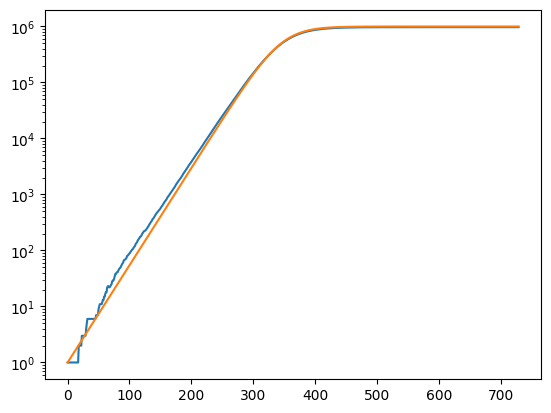

In [5]:
import matplotlib.pyplot as plt

plt.plot(model.patches.cases)
plt.plot(1e6 / (1 + (1e6 - 1) * np.exp(-0.04 * (np.arange(730)))))
plt.yscale("log")

In [6]:
model.patches.cases[-100:]

array([[971887],
       [971951],
       [972002],
       [972039],
       [972016],
       [971977],
       [971983],
       [971899],
       [971918],
       [971977],
       [971956],
       [972079],
       [972069],
       [972102],
       [972094],
       [972098],
       [972115],
       [972120],
       [972173],
       [972124],
       [972091],
       [972102],
       [972056],
       [972024],
       [972078],
       [972053],
       [972069],
       [972039],
       [972008],
       [972040],
       [972132],
       [972191],
       [972177],
       [972194],
       [972132],
       [972203],
       [972213],
       [972258],
       [972283],
       [972232],
       [972207],
       [972227],
       [972144],
       [972160],
       [972117],
       [972156],
       [972172],
       [972231],
       [972226],
       [972204],
       [972149],
       [972185],
       [972183],
       [972226],
       [972191],
       [972158],
       [972210],
       [972229],
       [972264

In [9]:
500/1000/365

0.0013698630136986301

In [10]:
1-(parameters["cbr"]/1000/365)/parameters["beta"]

0.9726027397260274